Works on the logs generated by jupyter files. check phi4.log and gemini2-flash.log for examples

In [48]:
import matplotlib.pyplot as plt


def calculate_running_accuracy(filename):
    averages_horn_1 = []
    averages_horn_0 = []

    with open(filename, 'r') as f:
        current_horn = 1
        correct_count = 0
        total_count = 0
        current_index = 0

        for line in f:
            current_index += 1
            parts = line.strip().split()
            values = {part.split('=')[0]: int(part.split('=')[1].replace("None", "-1")) for part in parts}
            got = values['got']
            sat = values['sat']
            horn = values['horn']

            if horn == current_horn:
                total_count += 1
                if got == sat:
                    correct_count += 1
            else:
                if total_count > 0:
                    average = correct_count / total_count
                    if current_horn == 1:
                        averages_horn_1.append(average)
                    else:
                        averages_horn_0.append(average)

                current_horn = horn
                correct_count = 1 if got == sat else 0
                total_count = 1

    if total_count > 0:
        average = correct_count / total_count
        if current_horn == 1:
            averages_horn_1.append(average)
        else:
            averages_horn_0.append(average)

    return averages_horn_1, averages_horn_0


def plot_averages(averages_horn_1, averages_horn_0):
    xs = [x//2 for x in range(6, len(averages_horn_1) + 6)]

    def plot(xs, avgs, label, color):
        plt.plot(xs[1::2], avgs[1::2], linestyle='-', color=color, marker='o', label="clauses=3 " + label)
        plt.plot(xs[::2], avgs[::2], linestyle='--', color=color, marker='x', label="clauses=4 " + label)

    plot(xs, averages_horn_1, label='horn=1', color="red")
    plot(xs, averages_horn_0, label='horn=0', color="blue")

    plt.xlabel('vars')
    plt.ylabel('accuracy')
    plt.title('Running Accuracy')
    plt.legend()
    plt.grid(axis='y')
    plt.ylim(0, 1.2)
    plt.show()


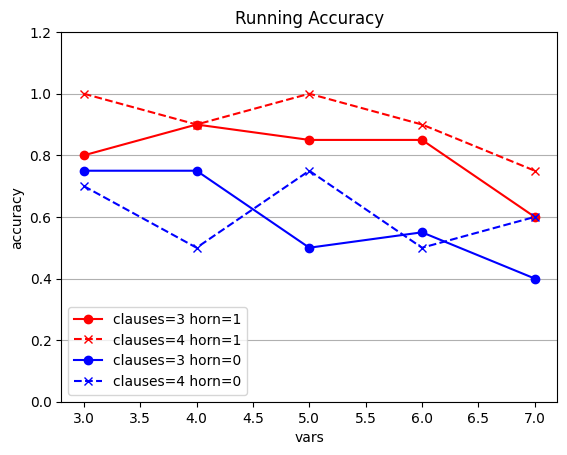

In [51]:
plot_averages(*calculate_running_accuracy('phi4.log'))

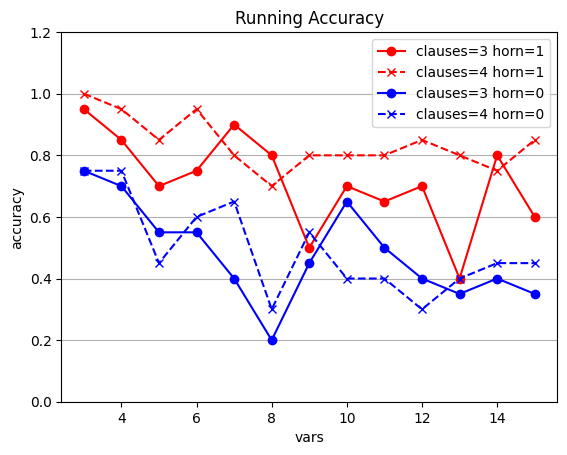

In [52]:
plot_averages(*calculate_running_accuracy('gemini2-flash.log'))